![*INTERTECHNICA - SOLON EDUCATIONAL PROGRAMS - TECHNOLOGY LINE*](https://solon.intertechnica.com/assets/IntertechnicaSolonEducationalPrograms-TechnologyLine.png)

# Python for Data Exploration - Numerical Variables

*This notebook will focus on exploring numerical variables using Python*.

Initializing environment for machine learning use:

In [1]:
!python -m pip install numpy
!python -m pip install matplotlib

## 1. Data Loading & Minimal Processing

We will use the **Cleveland Heart Disease Data Set** from University of California Irvine. This dataset is focused on heart disease prediction based on several personal health indicators. 

We will load the raw data in textual format so we can process it even if there are formatting errors:

In [2]:
import numpy as np

In [3]:
# import packages for remote data load
import requests
import io

# read data remotely
data_url = "https://raw.githubusercontent.com/INTERTECHNICA-BUSINESS-SOLUTIONS-SRL/Applying-Python-in-Machine-Learning/master/notebooks/data_exploration_processed_cleveland_data.csv"
response = requests.get(data_url)

raw_data = np.loadtxt(
    "data_exploration_processed_cleveland_data.csv", 
    skiprows = 0, 
    delimiter = ",", 
    dtype = {
            "names" : (
                "age", #age in years 
                "sex", #sex (1 = male; 0 = female) 
                "cp", #chest pain type:  1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic   
                "trestbps", #resting blood pressure (in mm Hg on admission to the hospital) 
                "chol", #serum cholestoral in mg/dl 
                "fbs", #fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 
                "restecg", #resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality,  
                           #                        2: showing probable or definite left ventricular hypertrophy)
                "thalach", #maximum heart rate achieved 
                "exang", #exercise induced angina (1 = yes; 0 = no) 
                "oldpeak", #ST depression induced by exercise relative to rest 
                "slope", #the slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)
                "ca", #number of major vessels (0-3) colored by flourosopy 
                "thal", #3 = normal; 6 = fixed defect; 7 = reversable defect, ? = unknown 
                "diagnosis", #diagnosis of heart disease (angiographic disease status)  
                         # 0: no heart disease
                         # 1-4: heart disease present
                         #target variable   
            ),
            "formats": ["U20"] * 14 }
)

We will extract only the numerical attributes, ignoring categorical ones:

In [4]:
numerical_attribute_names = ["chol", "age", "trestbps", "thalach", "oldpeak", "ca"]
target_variable_name = "diagnosis" 

raw_data_numerical = raw_data[numerical_attribute_names]
raw_data_target = raw_data[target_variable_name]

We will convert categorical data to float values, setting unknown data (literal '?') to np.NaN (this means not a numeric value).

In [5]:
# create a categorical data where everything will be stored as float
numerical_data = np.zeros(
    shape = raw_data_numerical.shape, 
    dtype = {
                "names"   : raw_data_numerical.dtype.names,
                "formats" : ["f8"] * len(raw_data_numerical.dtype.names)
            }    
)

# process data so it will be represented as float values
for name in numerical_attribute_names :
    # force unknown values to None
    raw_data_numerical[raw_data_numerical[name] == "?"] = np.NaN
    
    # convert attribute data to float
    numerical_data[name] = raw_data_numerical[name].astype(float)


We will convert target data to integer codes, creating a dual class target variable.

In [6]:
# convert target data to int codes    
target_data = raw_data_target.astype(int)

# force target data to 0 - no heart disease, 1 - heart disease present
target_data[target_data > 0] = 1

## 2. Loading matplotlib for Data Visualization

The **matplotlib** library is the standard library used for data visualization. It offers a large area of graphs and it is also extended by other libraries such as **seaborn** or **plotly**.

In [7]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

## 4. Exploring continuous variables

Let's explore the numerical variables characteristics and their relation with the target variable.  
We will do this for the **chol** numerical variable (this exercise can be repeated for other variables as well).

It is important to understand the basic statistical characteristic of the numerical variable:

In [8]:
# retrieve data
variable_name = "chol"
var_data = numerical_data[variable_name]

# count missing data
var_missing_count = var_data[np.isnan(var_data)].shape[0]
var_valid_count = var_data[~np.isnan(var_data)].shape[0]

# get valid data
var_data_valid = var_data[~np.isnan(var_data)]

# get basic statistics for valid data
var_min = np.min(var_data_valid)
var_mean = np.mean(var_data_valid)
var_median = np.median(var_data_valid)
var_max = np.max(var_data_valid)
var_stdev = np.std(var_data_valid)

# print statistics
print ("The basic statistics for '{}' numerical variables are:".format(variable_name))
print ("Count of missing data: {}".format(var_missing_count))
print ("Count of valid data: {}".format(var_valid_count))
print ("Min : {}".format(var_min))
print ("Max : {}".format(var_max))
print ("Mean : {}".format(var_mean))
print ("Median : {}".format(var_median))
print ("Standard Deviation : {}".format(var_stdev))

The basic statistics for 'chol' numerical variables are:
Count of missing data: 0
Count of valid data: 303
Min : 126.0
Max : 564.0
Mean : 246.69306930693068
Median : 241.0
Standard Deviation : 51.6914064726489


We can observe that there are some missing values however their number is quite low. The median and mean are close to each other, thus the data seems to be relatively simetric distributed near the mean.

Let's visualize the data distribution using a histogram:

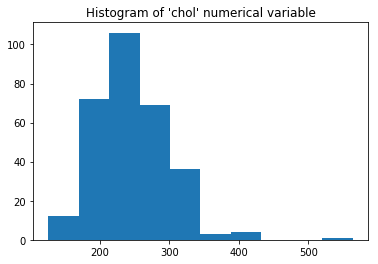

In [9]:
#  plot a histogram for the numerical variable
plt.hist(var_data_valid)
plt.title("Histogram of '{}' numerical variable".format(variable_name))
plt.show()

We can see that the dataset is pretty simetrical (close to a **normal distribution**), however there are a few records which are very different from the regular ones. Such records are called **outliers** and they may disrupt prediction.  
Let's see the number records which are within 3 standard deviations from the mean (basic rule of thumb): 

In [10]:
var_outlier_count = var_data_valid[(np.abs(var_data_valid - var_mean) > 3 * var_stdev)].shape[0]

print("Number of '{}' outliers is: {}".format(variable_name, var_outlier_count))

Number of 'chol' outliers is: 4


Since we only have a few outliers we may consider dropping the records with outliers (however we should be careful as this may reflect interesting statistical relations).

To have a better visualization of the relation between the numerical variable and the target variable (which is categorical) we will use a **boxplot**.  
First, let's prepare the data so we have two data arrays: one containing data for no disease condition and the other for disease present condition: 

In [11]:
# let's map together chol and target data
var_target_data = np.vstack((var_data, target_data))

# drop records where data is invalid
var_target_data_clean_indexes = np.where(~np.isnan(var_target_data[0]))[0]
var_target_data_clean = var_target_data[:,var_target_data_clean_indexes]

# created no disease and disease present data buckets
var_no_disease_indexes = np.where(var_target_data_clean[1] == 0)[0]
var_disease_present_indexes = np.where(var_target_data_clean[1] == 1)[0]

var_no_disease_data = var_target_data_clean[:,var_no_disease_indexes][0]
var_disease_present_data = var_target_data_clean[:,var_disease_present_indexes][0]

Let's display the boxplot for chol attribute data:

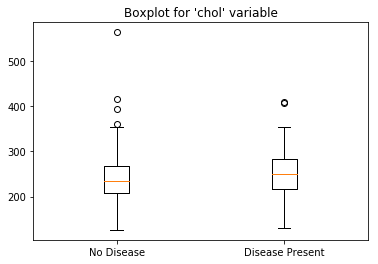

In [12]:
plt.boxplot([var_no_disease_data, var_disease_present_data], labels=["No Disease", "Disease Present"])
plt.title("Boxplot for '{}' variable".format(variable_name))
plt.show()

We can see that a higher chol value tends to favor the existence of the heart disease, however the effect does not seem to be significant.  
Moreover, there are high values of chol even for No Disease status (they are shown as outliers).  
The 'chol' variable may not contribute massively to the prediction of disease status.

Let's plot the histograms for other numerical variables as well:

In [13]:
#prepare data
attributes_plotted = numerical_attribute_names[1:]
count_attributes_ploted = len(attributes_plotted) 

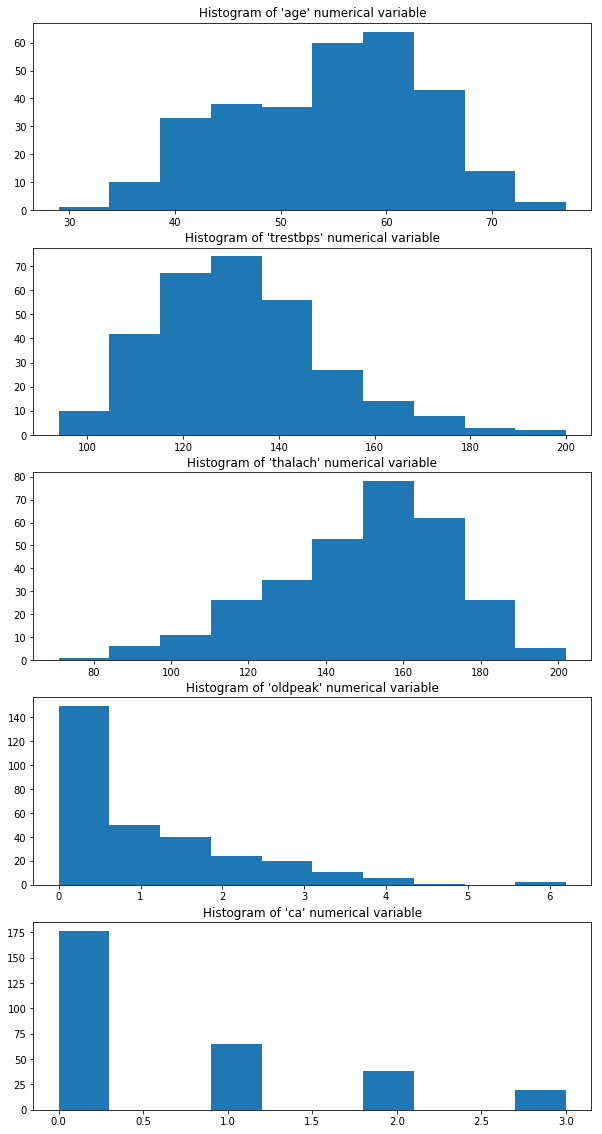

In [14]:
# prepare the subplot infrastructure 
fig, axes = plt.subplots (
    count_attributes_ploted, 
    figsize=(2*count_attributes_ploted, 4*count_attributes_ploted)
)
index = 0

# plot data 
for var_name in attributes_plotted : 
    # get the variable data
    var_data = numerical_data[var_name]
    
    # clean data
    var_data_valid = var_data[~np.isnan(var_data)]
    
    # plot each variable in each own's subplot
    axes[index].hist(var_data_valid)
    axes[index].title.set_text("Histogram of '{}' numerical variable".format(var_name))
    
    index = index + 1
    
plt.show()

We can conclude the following:

* The **trestbps** variable is a bit right skewed;
* The **thalach** variable is a bit left skewed;
* The **oldpeak** variable is strongly right skewed;
* The **ca** variable is also strongly right skewed.

Strongly skewed variables usually need additional data processing to transform them in a dataset with a symmetric distribution.

Let's plot the box plot for other numerical variables:

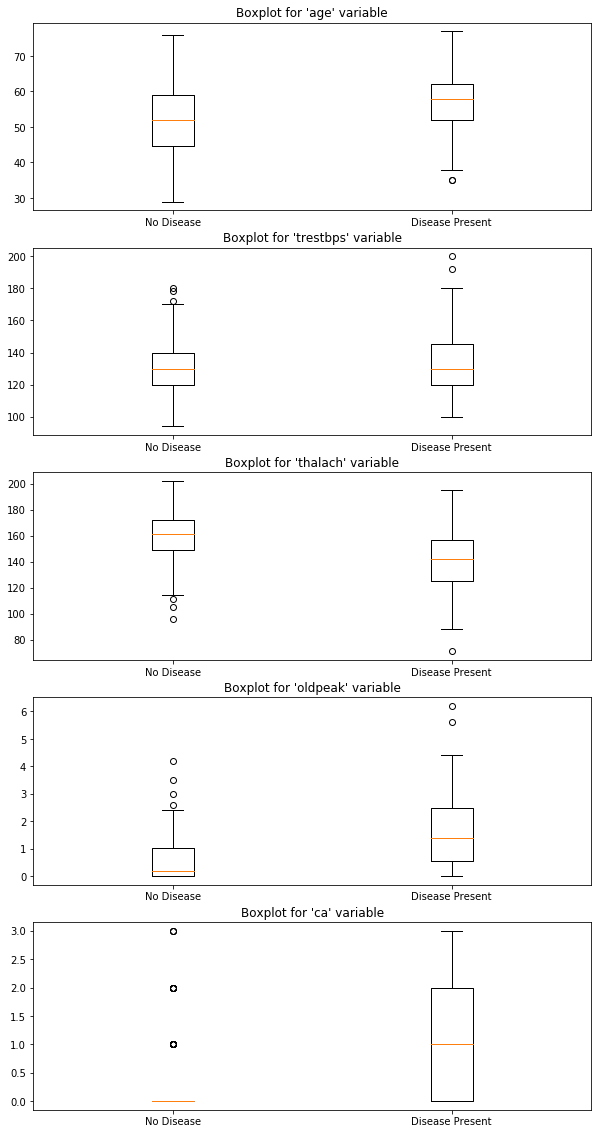

In [15]:
# prepare the subplot infrastructure 
fig, axes = plt.subplots (
    count_attributes_ploted, 
    figsize=(2*count_attributes_ploted, 4*count_attributes_ploted)
)

index = 0

# plot data 
for var_name in attributes_plotted :
    
    # get the variable data
    var_data = numerical_data[var_name]
    
    # let's map together variable and target data
    var_target_data = np.vstack((var_data, target_data))

    # drop records where data is invalid
    var_target_data_clean_indexes = np.where(~np.isnan(var_target_data[0]))[0]
    var_target_data_clean = var_target_data[:,var_target_data_clean_indexes]

    # created no disease and disease present data buckets
    var_no_disease_indexes = np.where(var_target_data_clean[1] == 0)[0]
    var_disease_present_indexes = np.where(var_target_data_clean[1] == 1)[0]

    var_no_disease_data = var_target_data_clean[:,var_no_disease_indexes][0]
    var_disease_present_data = var_target_data_clean[:,var_disease_present_indexes][0]
    
    # plot each variable in each own's subplot
    axes[index].boxplot([var_no_disease_data, var_disease_present_data], labels=["No Disease", "Disease Present"])
    axes[index].title.set_text("Boxplot for '{}' variable".format(var_name))
    
    index = index + 1
    
plt.show()    
    

We can conclude the following:

* The **age** variable indicates a higher occurence of heart disease when the age is higher. This should be a good predictor for the disease status.
* The **trestbps** value is not significantly different between **No Disease** and **Disease Present** conditions. Therefore we expect that this variable should be a low power predictor;
* A higher **thalach** value is associated with the **No Disease** status (even if there are some outliers on the low spectrum of values). This variable should be a good predictor for the disease status;
* A lower **oldpeak** value is associated with the **No Disease** status (even if there are some outliers on the high spectrum of values). This variable should be a good predictor for the disease status;
* A lower **ca** value is associated with the **No Disease** status (even if there are some outliers on the high spectrum of values). Since the ca variable is numerical-discrete in the 0-3 range, we can observe that having a non-zero value will be correlated with the **Disease Present** status. This variable should be a good predictor for the disease status.